# ****Importing Required Libraries****

In [1]:
# Importing python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

# ****Importing Data****


In [2]:
# Importing Data

df = pd.read_csv(r'/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv')
df.head(3)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74


# ****Column Description****


| Attribute |                   Description                         |
|-----------|-------------------------------------------------------|
| Hours_Studied | Number of hours spent studying per week. |
| Attendance | Percentage of classes attended. |
| Parental_Involvement | Level of parental involvement in the student's education (Low, Medium, High). |
| Access_to_Resources | Availability of educational resources (Low, Medium, High). |
| Extracurricular_Activities | Participation in extracurricular activities (Yes, No). |
| Sleep_Hours | Average number of hours of sleep per night. |
| Previous_Scores | Scores from previous exams. |
| Motivation_Level | Student's level of motivation (Low, Medium, High). |
| Internet_Access | Availability of internet access (Yes, No). |
| Tutoring_Sessions | Number of tutoring sessions attended per month. |
| Family_Income	| Family income level (Low, Medium, High). |
| Teacher_Quality | Quality of the teachers (Low, Medium, High). |
| School_Type | Type of school attended (Public, Private). |
| Peer_Influence | Influence of peers on academic performance (Positive, Neutral, Negative). |
| Physical_Activity | Average number of hours of physical activity per week. |
| Learning_Disabilities | Presence of learning disabilities (Yes, No). |
| Parental_Education_Level | Highest education level of parents (High School, College, Postgraduate). |
| Distance_from_Home | Distance from home to school (Near, Moderate, Far). |
| Gender | Gender of the student (Male, Female). |
| Exam_Score | Final exam score. |

# ****EDA****

In [3]:
# Getting information about data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [4]:
# Description of  Numerical features

df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [5]:
# Finding Null Values In data

df.isnull().sum() 

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [6]:
# Getting Percentage of null values present in "Teacher_Quality" Clolumn

df['Teacher_Quality'].value_counts(normalize = True)

Teacher_Quality
Medium    0.601164
High      0.298208
Low       0.100628
Name: proportion, dtype: float64

In [7]:
# Get Count of Null values in "Parental_Education_level" 

df['Parental_Education_Level'].value_counts()

Parental_Education_Level
High School     3223
College         1989
Postgraduate    1305
Name: count, dtype: int64

In [8]:
# Get Count of null values in "Distance_from_Home" column

df['Distance_from_Home'].value_counts()

Distance_from_Home
Near        3884
Moderate    1998
Far          658
Name: count, dtype: int64

In [9]:
# Dropping Null values from data

df.dropna(inplace = True)
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


## ****Plotting Graphs****

In [10]:
numerical_cols = df.select_dtypes(include = ['int64', 'float64'])
numerical_cols

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
0,23,84,7,73,0,3,67
1,19,64,8,59,2,4,61
2,24,98,7,91,2,4,74
3,29,89,8,98,1,4,71
4,19,92,6,65,3,4,70
...,...,...,...,...,...,...,...
6602,25,69,7,76,1,2,68
6603,23,76,8,81,3,2,69
6604,20,90,6,65,3,2,68
6605,10,86,6,91,2,3,68


### ****For Numerical Data****

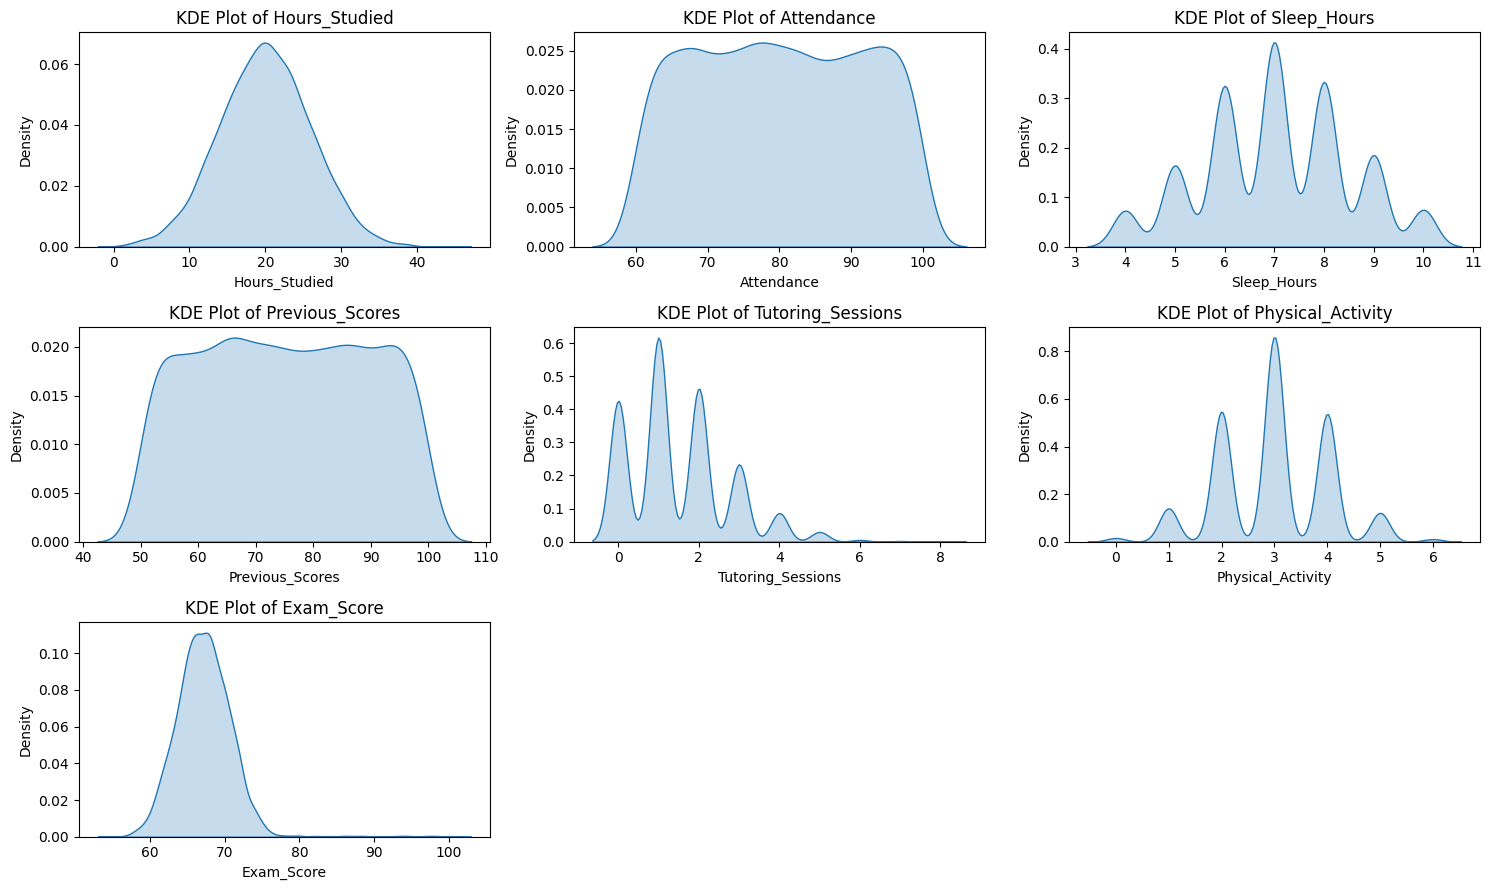

In [16]:
# Calculating rows for Graph plotting
n_cols = 3
n_rows = (len(numerical_cols.columns) + n_cols - 1) // n_cols

# Now create subplot for fig
fig, axis = plt.subplots(n_rows, n_cols, figsize = (15, 9))

# Converting 2D to 1D: [ax1, ax2, ax3....]
if n_cols > 1 or n_rows > 1:
    axis = axis.flatten()

# Plotting KDE Graph
for i, col in enumerate(numerical_cols):
    ax = axis[i]
    sns.kdeplot(data = df, x = col, ax = ax, fill = True)
    ax.set_title(f'KDE Plot of {col}')
    ax.set_xlabel(col)

for j in range(i + 1, len(axis)):
    fig.delaxes(axis[j])                                                         # Delete Remaining unused subplots
plt.tight_layout()
plt.show()

In [17]:
# Finding Categorical columns in Dataset

categorical_col = df.select_dtypes(include = ['category', 'object'])
categorical_col

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
0,Low,High,No,Low,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
1,Low,Medium,No,Low,Yes,Medium,Medium,Public,Negative,No,College,Moderate,Female
2,Medium,Medium,Yes,Medium,Yes,Medium,Medium,Public,Neutral,No,Postgraduate,Near,Male
3,Low,Medium,Yes,Medium,Yes,Medium,Medium,Public,Negative,No,High School,Moderate,Male
4,Medium,Medium,Yes,Medium,Yes,Medium,High,Public,Neutral,No,College,Near,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,High,Medium,No,Medium,Yes,High,Medium,Public,Positive,No,High School,Near,Female
6603,High,Medium,No,Medium,Yes,Low,High,Public,Positive,No,High School,Near,Female
6604,Medium,Low,Yes,Low,Yes,Low,Medium,Public,Negative,No,Postgraduate,Near,Female
6605,High,High,Yes,High,Yes,Low,Medium,Private,Positive,No,High School,Far,Female


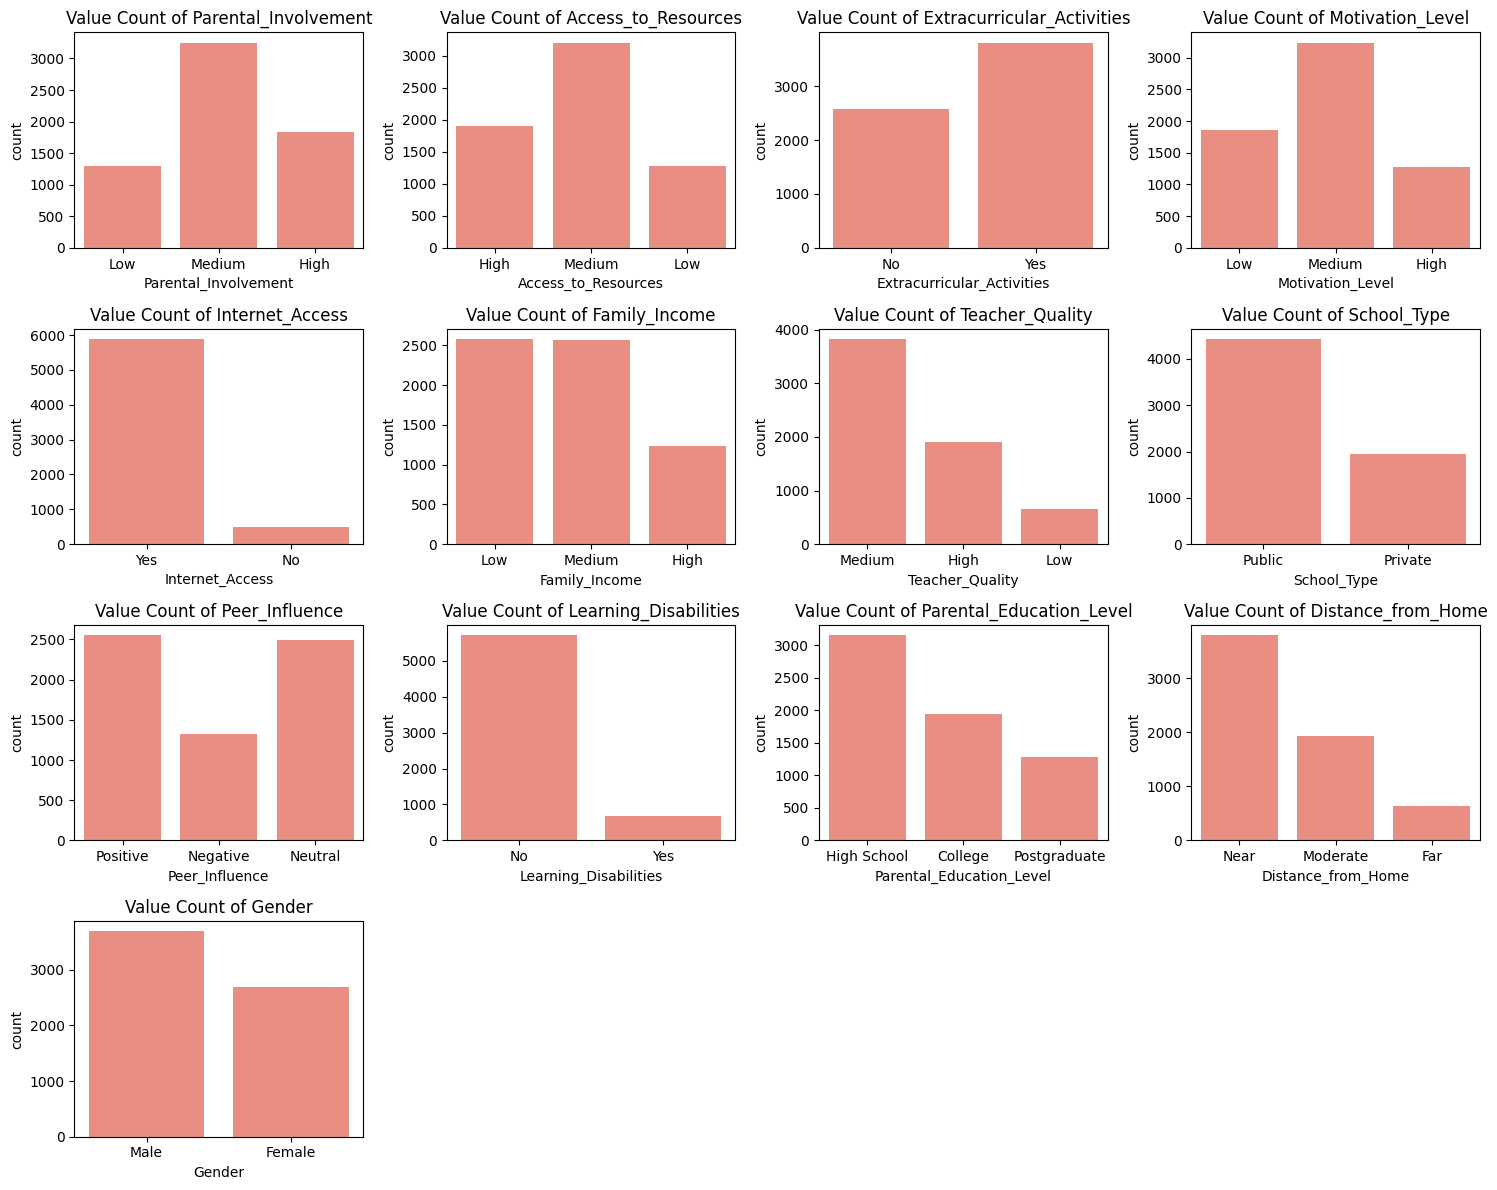

In [31]:
# Calculating Rows need for plotting subplots
n_cols = 4
n_rows = (len(categorical_col.columns) + n_cols - 1) // n_cols

# create a subplots required for plotting figure
fig, axes = plt.subplots(n_rows, n_cols, figsize = (15, 12))

# Converting 2D to 1D : [ax1, ax2, ax3....]
if n_cols > 1 or n_rows > 1:
    axes = axes.flatten()

# Plotting Countplot for Each Categorical Columns
for i, col in enumerate(categorical_col):
    ax = axes[i]
    sns.countplot(data = df, x = col, color = 'salmon', ax = ax)
    ax.set_title(f'Value Count of {col}')
    ax.set_xlabel(col)

# Removing Unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## ****Ordinal Encoder****

In [75]:
# Using Columntransformer we are converting those columns which contains ['Low', 'Medium', 'High'] values.

trf1 = ColumnTransformer([
    ('OE_Low_Medium_high', OrdinalEncoder(categories = [['Low', 'Medium', 'High']]), [2, 3, 7, 10, 11])    
], remainder = 'passthrough')

In [76]:
# Now using columntransformer to convert thoe columns which contains ['Positive', 'Negative', 'Neutral'] values.

trf2 = ColumnTransformer([
    ('OE_Positive_Negative_Neutral', OrdinalEncoder(categories = [['Positive', 'Negative', 'Neutral']]), [13])
], remainder = 'passthrough')

In [78]:
# Use ColumnTransformer to conevert columns having ['High School', 'College', 'Postgraduate'] values.

trf3 = ColumnTransformer([
    ('OE_HighSchool_College_Postgraduate', OrdinalEncoder(categories = [['High School', 'College', 'Postgraduate']]), [16])
], remainder = 'passthrough')

In [80]:
# Use ColumnTransformer to convert columns with ['Near', 'Moderate', 'Far'] values.
trf4 = ColumnTransformer([
    ('OE_Near_Moderate_Far', OrdinalEncoder(categories = [['Near', 'Moderate', 'Far']]), [17])
], remainder = 'passthrough')

## ****OneHotEncoding****

In [85]:
# Apply OneHotEncoding for remained categorical columns

trf5 = ColumnTransformer([
    ('OneHotEncoding', OneHotEncoder(handle_unknown = 'ignore', sparse_output = False, drop = 'first'), [4, 8, 12, 15, 18])
], remainder = 'passthrough')